# Keras Image Application - Ensemble 학습

In [43]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101

In [2]:
!unzip animals.zip -d animals > /dev/null

- 네 가지 모델과 앙상블이 어떻게 예측하는지

In [3]:
vgg16 = VGG16()
vgg19 = VGG19()
resnet50 = ResNet50()
resnet101 = ResNet101()

179658752/179648224 [==============================] - 3s 0us/step


In [24]:
'bear.jpg'.split('.')[0]

'bear'

## 1-1. 이미지 축소 후 예측

In [33]:
print(flist[0])

In [34]:
# 파일 내의 이미지를 전부 읽어들인 뒤 축소
import os

flist = [vgg16, vgg19, resnet50, resnet101]
flist_nm = ['vgg16', 'vgg19', 'resnet50', 'resnet101']
for fname in os.listdir('./animals'):
    img = Image.open('./animals/'+fname).resize((224, 224))
    print(f"이미지명 : {fname.split('.')[0]}")

    for nm, func in zip(flist_nm, flist):
        yhat = func.predict(np.array(img).reshape(1, 224, 224, 3))
        label = decode_predictions(yhat)
        print(nm)
        print(label, end = '\n\n')
    print(end = '\n\n')

이미지명 : hawk
vgg16
[[('n01608432', 'kite', 0.9589864), ('n01817953', 'African_grey', 0.02248143), ('n02058221', 'albatross', 0.003387343), ('n02018795', 'bustard', 0.0030825494), ('n02051845', 'pelican', 0.0019424733)]]

vgg19
[[('n01608432', 'kite', 0.97138095), ('n02058221', 'albatross', 0.013101698), ('n02009229', 'little_blue_heron', 0.0033706687), ('n01616318', 'vulture', 0.0018360978), ('n01580077', 'jay', 0.0013862329)]]

resnet50
[[('n01608432', 'kite', 0.6629598), ('n04153751', 'screw', 0.26666662), ('n04141327', 'scabbard', 0.03164005), ('n02058221', 'albatross', 0.02132014), ('n03658185', 'letter_opener', 0.0061939023)]]

resnet101
[[('n01608432', 'kite', 0.999059), ('n03804744', 'nail', 0.00033423092), ('n02037110', 'oystercatcher', 0.0001886403), ('n02058221', 'albatross', 0.0001036052), ('n01833805', 'hummingbird', 6.3147076e-05)]]



이미지명 : lion
vgg16
[[('n02129165', 'lion', 0.52587897), ('n02097474', 'Tibetan_terrier', 0.06724853), ('n02127052', 'lynx', 0.03168723), ('n0

## 앙상블

## 1.2 이미지 센터링


In [42]:
from image_util import center_image

lines =[]
for fname in os.listdir('./animals'):
    img = Image.open('./animals/'+fname)
    img = center_image(img, src_format = 'Pillow', dst_format = 'Pillow')
    name = fname.split('.')[0]

    yhat_vgg16 = vgg16.predict(np.array(img).reshape(1, 224, 224, 3))
    yhat_vgg19 = vgg19.predict(np.array(img).reshape(1, 224, 224, 3))
    yhat_resnet50 = resnet50.predict(np.array(img).reshape(1, 224, 224, 3))
    yhat_resnet101 = resnet101.predict(np.array(img).reshape(1, 224, 224, 3))
    yhat_ens = (yhat_vgg16 + yhat_vgg19 + yhat_resnet50 + yhat_resnet101) / 4

    pred_vgg16 = decode_predictions(yhat_vgg16)[0][0][1]
    pred_vgg19 = decode_predictions(yhat_vgg19)[0][0][1]
    pred_resnet50 = decode_predictions(yhat_resnet50)[0][0][1]
    pred_resnet101 = decode_predictions(yhat_resnet101)[0][0][1]
    pred_ens = decode_predictions(yhat_ens)[0][0][1]

    lines.append([name, pred_vgg16, pred_vgg19, pred_resnet50, pred_resnet101, pred_ens])

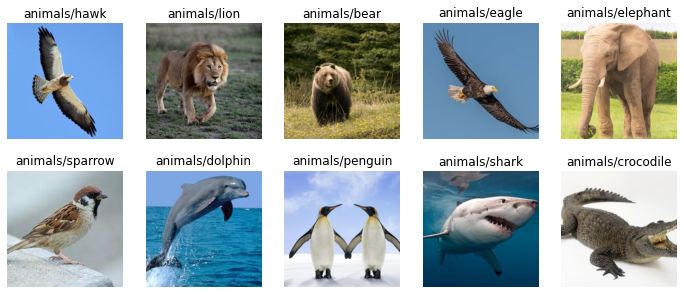

In [48]:
from glob import glob

plt.figure(figsize = (12, 5))
for i , fname in enumerate(glob('animals/*.jpg')):
    plt.subplot(2, 5, i +1)
    plt.imshow(center_image(Image.open(fname), src_format = 'Pillow', dst_format = 'Pillow'))
    plt.title(fname.split('.')[0])
    plt.axis('off')
plt.show()

In [50]:
pd.DataFrame(lines, columns = ['name', 'vgg16', 'vgg19', 'resnet50', 'resnet101', 'ens'])

,name,vgg16,vgg19,resnet50,resnet101,ens
0,hawk,kite,kite,screw,kite,kite
1,lion,lion,lion,lion,lion,lion
2,bear,brown_bear,ice_bear,ice_bear,brown_bear,ice_bear
3,eagle,kite,kite,kite,kite,kite
4,elephant,African_elephant,African_elephant,African_elephant,African_elephant,African_elephant
5,sparrow,quail,jay,chickadee,jay,jay
6,dolphin,dugong,hammerhead,hammerhead,hammerhead,hammerhead
7,penguin,king_penguin,king_penguin,king_penguin,king_penguin,king_penguin
8,shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark
9,crocodile,agama,American_alligator,American_alligator,American_alligator,American_alligator
